In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

Query Date:  2016-08-23


Text(0, 0.5, 'Precipitation (inches)')

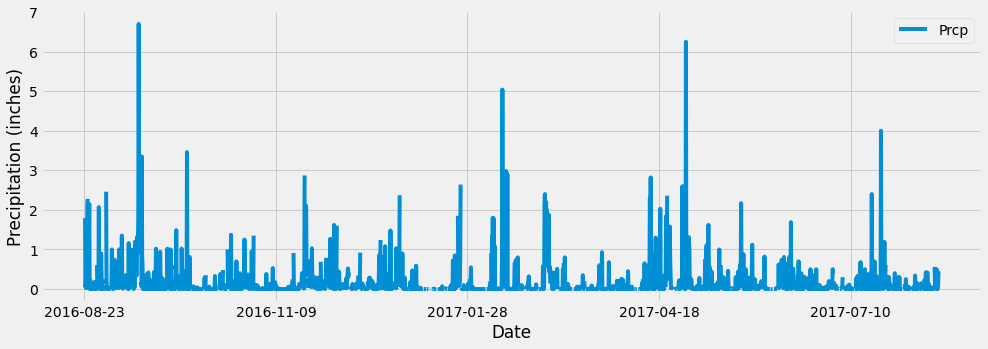

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the date and precipitation scores

year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
year

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year, columns=['Date', 'Prcp'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df = df.sort_values(["Date"])


# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(x_compat=True, figsize=(15,5))
ax.set_ylabel('Precipitation (inches)')


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
# Find the most recent date in the data set.
total_stations = session.query(Station.station).count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
       func.avg(Measurement.tobs),
       func.min(Measurement.tobs),
       func.max(Measurement.tobs)]

results = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).all()

for result in results:
    print(f"Average: {result[1]}")
    print(f"Lowest: {result[2]}")
    print(f"Highest: {result[3]}")

Average: 71.66378066378067
Lowest: 54.0
Highest: 85.0


Query Date:  2016-08-18


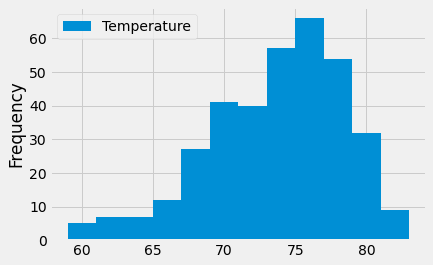

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date at station USC00519281
session.query(Measurement.station, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date at station USC00519281
query_date2 = dt.date(2017, 8,18) - dt.timedelta(days=365)
print("Query Date: ", query_date2)

# Perform a query to retrieve the date and tobs at station USC00519281
temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date2).all()
temp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(temp_data, columns=['Station','Date', 'Temperature'])
df.set_index('Date', inplace=True)
df=df.drop(columns=['Station'])
df

# Plot df as histogram
df.plot.hist(bins=12)

# Close session

In [1]:
# Close Session
session.close()

NameError: name 'session' is not defined